# Credit Score Classification

#### Problem Statement
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

#### Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

# About Dataset

The dataset is originaly from:
https://www.kaggle.com/datasets/parisrohan/credit-score-classification

This dataset has 2 files:
1. <b>'trains.csv'</b> which contains the dataset for the machine learning training.
2. <b>'test.csv'</b> which contains the dataset for the final testing.

# 1. Data Collection

Import libraries.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Read the data set using <code> .pd.read_csv </code>

In [3]:
df = pd.read_csv('train.csv')
final_test = pd.read_csv('test.csv')

<code>.head</code> method is used to display the first 5 columns of the dataframe.

In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# 2. Data Preparation

`.shape` method return a tuple representing the dimensionality of the DataFrame.

In [5]:
df.shape

(100000, 28)

`.info()` method prints information about a DataFrame including the column name, dtype, etc.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Drop some of the columns that we don't really need using the method <code>.drop()</code>.

In [7]:
col_name = ['ID','Customer_ID','Month','Name','SSN','Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate','Num_of_Loan',
            'Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix','Credit_Utilization_Ratio']
df = df.drop(col_name , axis=1)
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,7,809.98,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,-1,NaN,809.98,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,7,809.98,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,5,4,809.98,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,6,NaN,809.98,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
df.dtypes

Age                         object
Occupation                  object
Annual_Income               object
Monthly_Inhand_Salary      float64
Delay_from_due_date          int64
Num_of_Delayed_Payment      object
Outstanding_Debt            object
Credit_History_Age          object
Payment_of_Min_Amount       object
Total_EMI_per_month        float64
Amount_invested_monthly     object
Payment_Behaviour           object
Monthly_Balance             object
Credit_Score                object
dtype: object

Some of the numerical features is read as object. We can check the unique values of those columns to see if there's any string in the values.

In [9]:
numerical=['Age','Annual_Income','Num_of_Delayed_Payment','Outstanding_Debt',
           'Amount_invested_monthly','Monthly_Balance']
for i in numerical:
    print(i, 'unique values:', df[i].unique(), '\n')

Age unique values: ['23' '-500' '28_' ... '4808_' '2263' '1342'] 

Annual_Income unique values: ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_'] 

Num_of_Delayed_Payment unique values: ['7' nan '4' '8_' '6' '1' '-1' '3_' '0' '8' '5' '3' '9' '12' '15' '17'
 '10' '2' '2_' '11' '14' '20' '22' '13' '13_' '14_' '16' '12_' '18' '19'
 '23' '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '21_'
 '25' '10_' '183_' '9_' '1106' '834' '19_' '24_' '17_' '23_' '2672' '20_'
 '2008' '-3' '538' '6_' '1_' '16_' '27' '-2' '3478' '2420' '15_' '707'
 '708' '26_' '18_' '3815' '28' '5_' '1867' '2250' '1463' '25_' '7_' '4126'
 '2882' '1941' '2655' '2628' '132' '3069' '306' '0_' '3539' '3684' '1823'
 '4128' '1946' '827' '2297' '2566' '904' '182' '929' '3568' '2503' '1552'
 '2812' '1697' '3764' '851' '3905' '923' '88' '1668' '3253' '808' '2689'
 '3858' '642' '3457' '1402' '1732' '3154' '847' '3037' '2204' '3103'
 '1063' '2056' '1282' '1841' '2569_' '211' '793' '3484' '411' '3

We should check the categorical columns too to see if there's some typo / symbol in the value.

In [10]:
category=['Occupation','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
for i in category:
    print(i, 'unique values:', df[i].unique(), '\n')

Occupation unique values: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect'] 

Payment_of_Min_Amount unique values: ['No' 'NM' 'Yes'] 

Payment_Behaviour unique values: ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments'] 

Credit_Score unique values: ['Good' 'Standard' 'Poor'] 



As expected, these columns have a string value where the columns should only contain numerical values. We shold remove the string so we can convert these columns to float.

We also need to remove '_______' value from the Occupation column and '!@9#%8' value from the Payment_Behaviour column.

In [11]:
symbol = "\\`*__{}[]()>#@+!$:;"
for i in numerical:
    for sym in symbol:
        df[i] = df[i].astype(str).str.replace(sym,'')

df.drop(df[df['Occupation'] == '_______'].index, inplace = True)
df.drop(df[df['Payment_Behaviour'] == '!@9#%8'].index, inplace = True)

for i in numerical:
    df[i] = df[i].astype(float)

For the 'Credit_History_Age' column, we need to extract the year from the string and then convert the column type to float too.

In [12]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.slice(0, 2)
df['Credit_History_Age'] = df['Credit_History_Age'].astype(float)

In [13]:
df.dtypes

Age                        float64
Occupation                  object
Annual_Income              float64
Monthly_Inhand_Salary      float64
Delay_from_due_date          int64
Num_of_Delayed_Payment     float64
Outstanding_Debt           float64
Credit_History_Age         float64
Payment_of_Min_Amount       object
Total_EMI_per_month        float64
Amount_invested_monthly    float64
Payment_Behaviour           object
Monthly_Balance            float64
Credit_Score                object
dtype: object

Then, check if there'is any missing value.

In [14]:
df.isnull().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary      12859
Delay_from_due_date            0
Num_of_Delayed_Payment      5951
Outstanding_Debt               0
Credit_History_Age          7760
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     3837
Payment_Behaviour              0
Monthly_Balance             1038
Credit_Score                   0
dtype: int64

There's a missing value in some of the features.

Replace the missing values of the columns with their means using the method <code>replace()</code>.

In [15]:
missing=['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Credit_History_Age','Amount_invested_monthly','Monthly_Balance']

for i in missing:
    df[i]=df[i].fillna(df[i].mean())
    
df.isnull().sum()

Age                        0
Occupation                 0
Annual_Income              0
Monthly_Inhand_Salary      0
Delay_from_due_date        0
Num_of_Delayed_Payment     0
Outstanding_Debt           0
Credit_History_Age         0
Payment_of_Min_Amount      0
Total_EMI_per_month        0
Amount_invested_monthly    0
Payment_Behaviour          0
Monthly_Balance            0
Credit_Score               0
dtype: int64

Use the method <code>describe()</code> to obtain a statistical summary of the data.

In [16]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,85852.000000,8.585200e+04,85852.000000,85852.000000,85852.000000,85852.000000,85852.000000,85852.000000,85852.000000,8.585200e+04
mean,110.037145,1.766410e+05,4193.599803,21.079486,31.143978,1425.753064,17.966885,1390.446852,636.122947,-3.144135e+22
std,681.927556,1.435051e+06,2938.071648,14.886996,219.657869,1154.227172,7.920630,8253.513036,1994.253977,3.217589e+24
min,-500.000000,7.005930e+03,303.645417,-5.000000,-3.000000,0.230000,0.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.942431e+04,1790.159583,10.000000,9.000000,565.720000,12.000000,30.338701,76.962729,2.676440e+02
50%,33.000000,3.757587e+04,3851.630000,18.000000,15.000000,1166.080000,17.966885,69.272824,143.027166,3.346617e+02
75%,42.000000,7.288608e+04,5375.590000,28.000000,19.000000,1948.980000,24.000000,161.034389,304.831401,4.677047e+02
max,8698.000000,2.419806e+07,15204.633333,67.000000,4397.000000,4998.070000,33.000000,82331.000000,10000.000000,1.602041e+03


It looks like there's some outliers on the data in the 'Age' column. We should remove outlier data from the 'Age' column.

In [17]:
Q1 = np.quantile(df['Age'],0.25)
Q3 = np.quantile(df['Age'],0.75)
IQR = Q3 - Q1
df = df.drop(df.loc[df['Age'] > (Q3 + 1.5 * IQR)].index)
df = df.drop(df.loc[df['Age'] < (Q1 - 1.5 * IQR)].index)

df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,83472.000000,8.347200e+04,83472.000000,83472.000000,83472.000000,83472.000000,83472.000000,83472.000000,83472.000000,8.347200e+04
mean,33.336879,1.767891e+05,4194.056538,21.090210,31.100214,1425.987780,17.967772,1382.217187,634.864484,-3.233104e+22
std,10.772496,1.436176e+06,2936.440656,14.885659,219.298783,1154.644425,7.920524,8220.628362,1991.128114,3.263134e+24
min,14.000000,7.005930e+03,303.645417,-5.000000,-3.000000,0.230000,0.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.943183e+04,1791.163333,10.000000,9.000000,565.660000,12.000000,30.370735,76.942315,2.676010e+02
50%,33.000000,3.757782e+04,3852.736667,18.000000,15.000000,1166.080000,17.966885,69.298731,143.124832,3.345694e+02
75%,42.000000,7.290270e+04,5379.470000,28.000000,19.000000,1948.980000,24.000000,161.340704,304.915711,4.676326e+02
max,56.000000,2.419806e+07,15204.633333,67.000000,4397.000000,4998.070000,33.000000,82331.000000,10000.000000,1.602041e+03


In [18]:
df.shape

(83472, 14)

Transform payment behaviour data to numerical

In [19]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(pd.to_numeric)

Transform the target data to numerical.

In [20]:
df['Credit_Score'] = df['Credit_Score'].str.replace('Good', '3', n=-1)
df['Credit_Score'] = df['Credit_Score'].str.replace('Standard', '2', n=-1)
df['Credit_Score'] = df['Credit_Score'].str.replace('Poor', '1', n=-1)
df['Credit_Score'] = df[['Credit_Score']].apply(pd.to_numeric)

Drop duplicate values from the data.

In [21]:
df = df.drop_duplicates()
df.count()

Age                        83472
Occupation                 83472
Annual_Income              83472
Monthly_Inhand_Salary      83472
Delay_from_due_date        83472
Num_of_Delayed_Payment     83472
Outstanding_Debt           83472
Credit_History_Age         83472
Payment_of_Min_Amount      83472
Total_EMI_per_month        83472
Amount_invested_monthly    83472
Payment_Behaviour          83472
Monthly_Balance            83472
Credit_Score               83472
dtype: int64

In [22]:
df.dtypes

Age                        float64
Occupation                  object
Annual_Income              float64
Monthly_Inhand_Salary      float64
Delay_from_due_date          int64
Num_of_Delayed_Payment     float64
Outstanding_Debt           float64
Credit_History_Age         float64
Payment_of_Min_Amount       object
Total_EMI_per_month        float64
Amount_invested_monthly    float64
Payment_Behaviour            int64
Monthly_Balance            float64
Credit_Score                 int64
dtype: object

In [23]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,7.000000,809.98,22.000000,No,49.574949,80.415295,4,312.494089,3
1,23.0,Scientist,19114.12,4193.599803,-1,31.143978,809.98,17.966885,No,49.574949,118.280222,3,284.629162,3
3,23.0,Scientist,19114.12,4193.599803,5,4.000000,809.98,22.000000,No,49.574949,199.458074,1,223.451310,3
4,23.0,Scientist,19114.12,1824.843333,6,31.143978,809.98,22.000000,No,49.574949,41.420153,5,341.489231,3
6,23.0,Scientist,19114.12,1824.843333,3,8.000000,809.98,22.000000,No,49.574949,178.344067,1,244.565317,3


# 3. Exploratory Data Analysis

<Axes: >

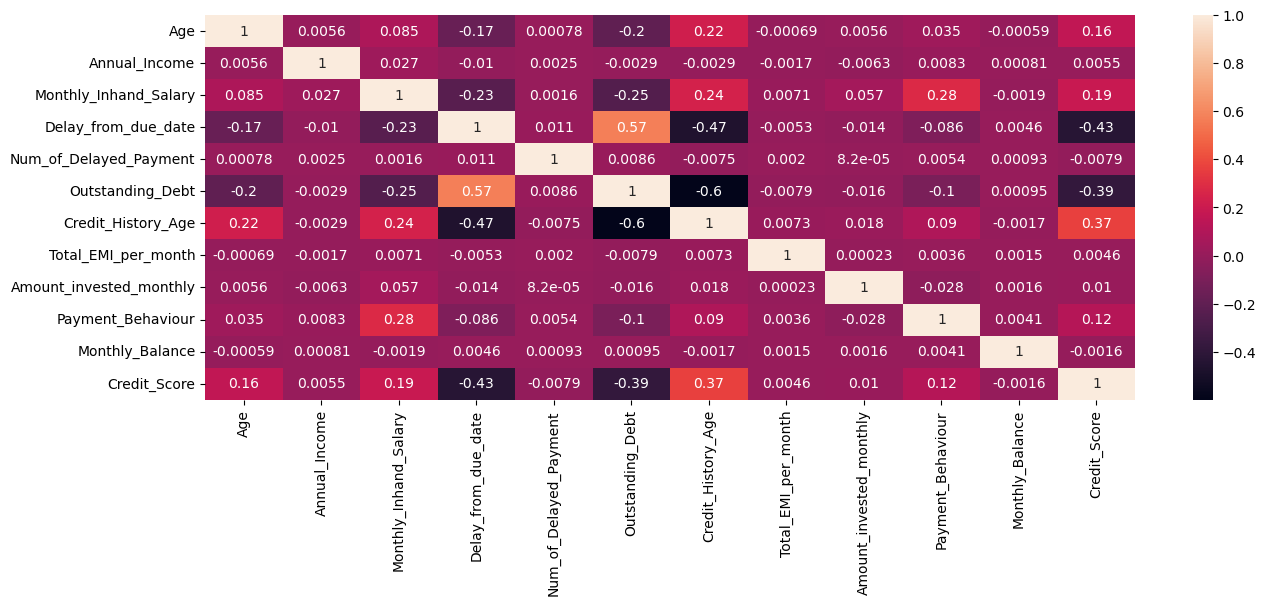

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), ax=ax, annot=True)

In [25]:
df['Credit_Score'].value_counts(dropna = False)

2    44426
1    24219
3    14827
Name: Credit_Score, dtype: int64

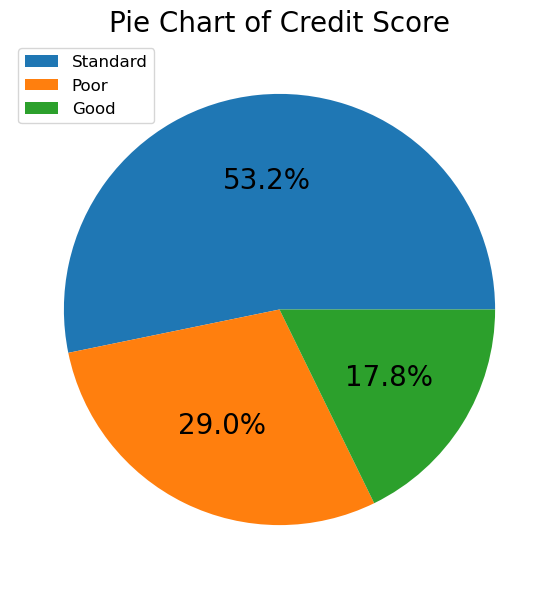

In [26]:
plt.figure(figsize=(10, 7))
label=['Standard','Poor','Good']
plt.pie(df['Credit_Score'].value_counts(dropna = False), autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Pie Chart of Credit Score',fontsize="20")
plt.legend(label, loc ="upper left", fontsize="12")
plt.show() 

In [27]:
df['Payment_Behaviour'].value_counts(dropna = False)

1    23096
5    15830
2    12522
6    12405
4    10237
3     9382
Name: Payment_Behaviour, dtype: int64

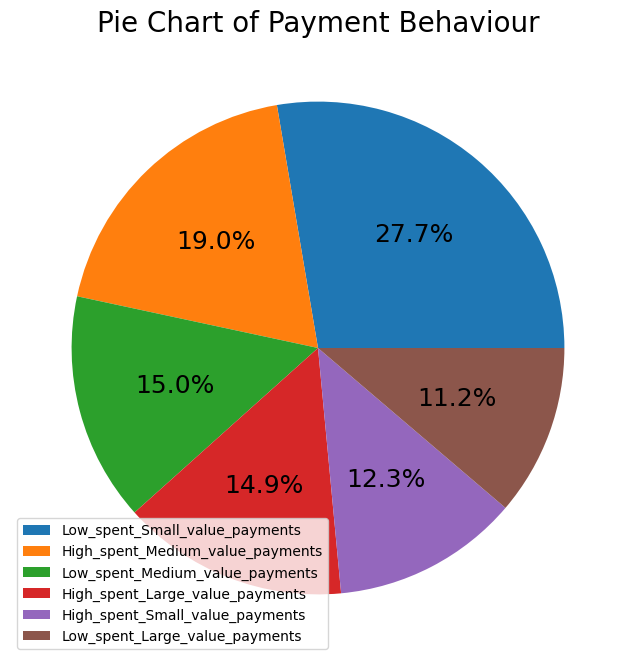

In [28]:
label=['Low_spent_Small_value_payments','High_spent_Medium_value_payments','Low_spent_Medium_value_payments',
       'High_spent_Large_value_payments','High_spent_Small_value_payments','Low_spent_Large_value_payments']
plt.figure(figsize=(25, 8))
plt.pie(df['Payment_Behaviour'].value_counts(dropna = False), autopct='%1.1f%%', textprops={'fontsize': 18})
plt.title('Pie Chart of Payment Behaviour',fontsize="20")
plt.legend(label, loc ="best", fontsize="10")
plt.show() 

In [29]:
df['Payment_of_Min_Amount'].value_counts(dropna = False)

Yes    43693
No     29755
NM     10024
Name: Payment_of_Min_Amount, dtype: int64

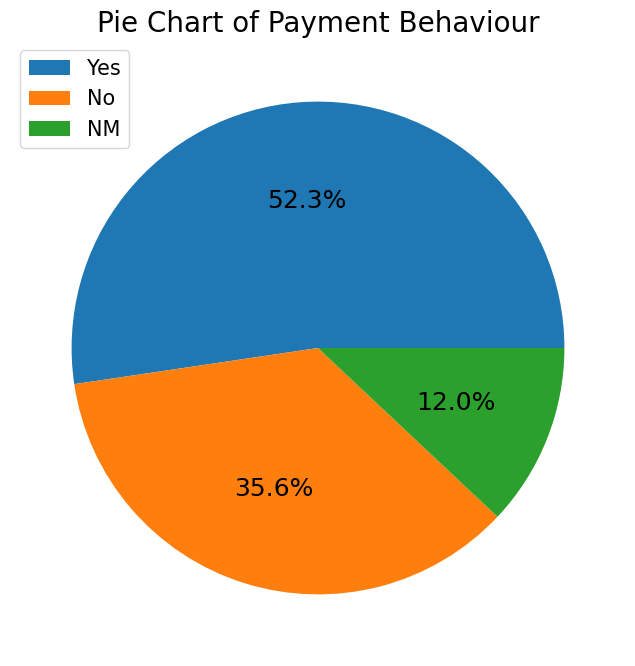

In [30]:
plt.figure(figsize=(25, 8))
plt.pie(df['Payment_of_Min_Amount'].value_counts(dropna = False), autopct='%1.1f%%', textprops={'fontsize': 18})
plt.title('Pie Chart of Payment Behaviour',fontsize="20")
plt.legend(df['Payment_of_Min_Amount'].value_counts(dropna = False).index, loc ="upper left", fontsize="15")
plt.show() 

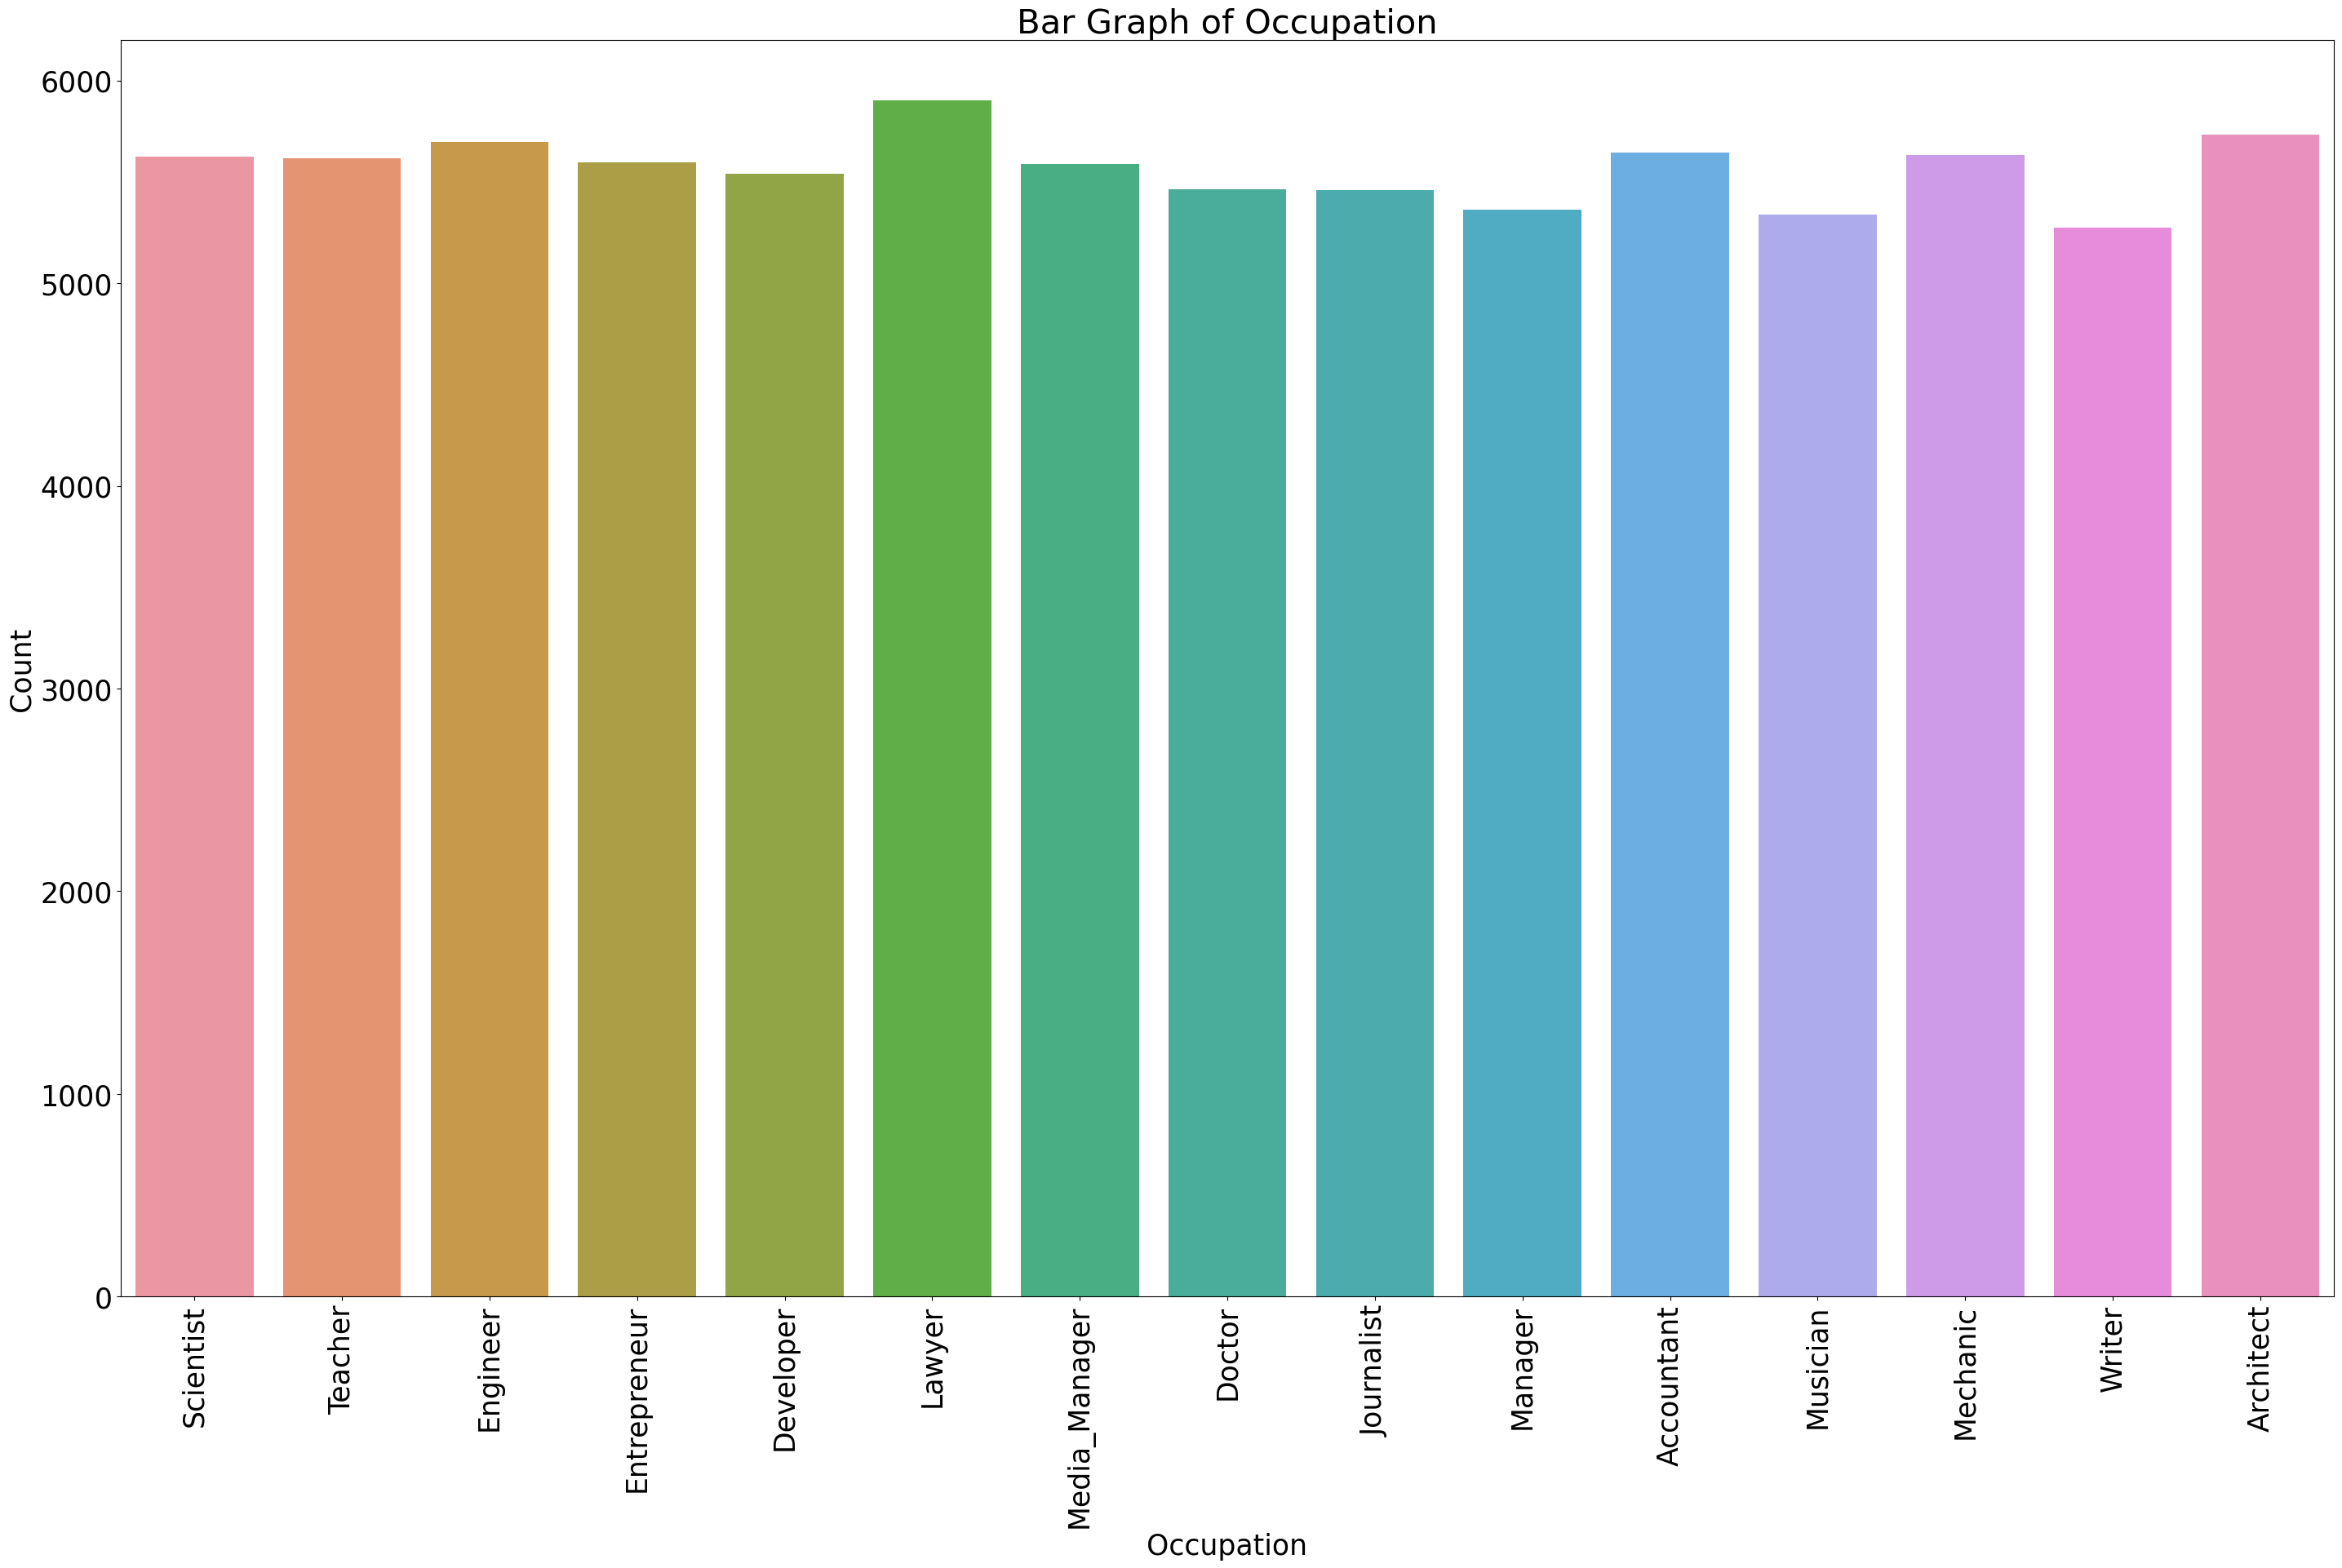

In [31]:
plt.figure(figsize=(35, 20))
sns.countplot(x=df['Occupation'])
plt.title('Bar Graph of Occupation', fontsize=30)
plt.ylabel('Count', fontsize=25)
plt.xlabel('Occupation', fontsize=25)
plt.xticks(rotation=90,fontsize='25')
plt.yticks(fontsize='25')
plt.show()

<Axes: xlabel='Outstanding_Debt', ylabel='Density'>

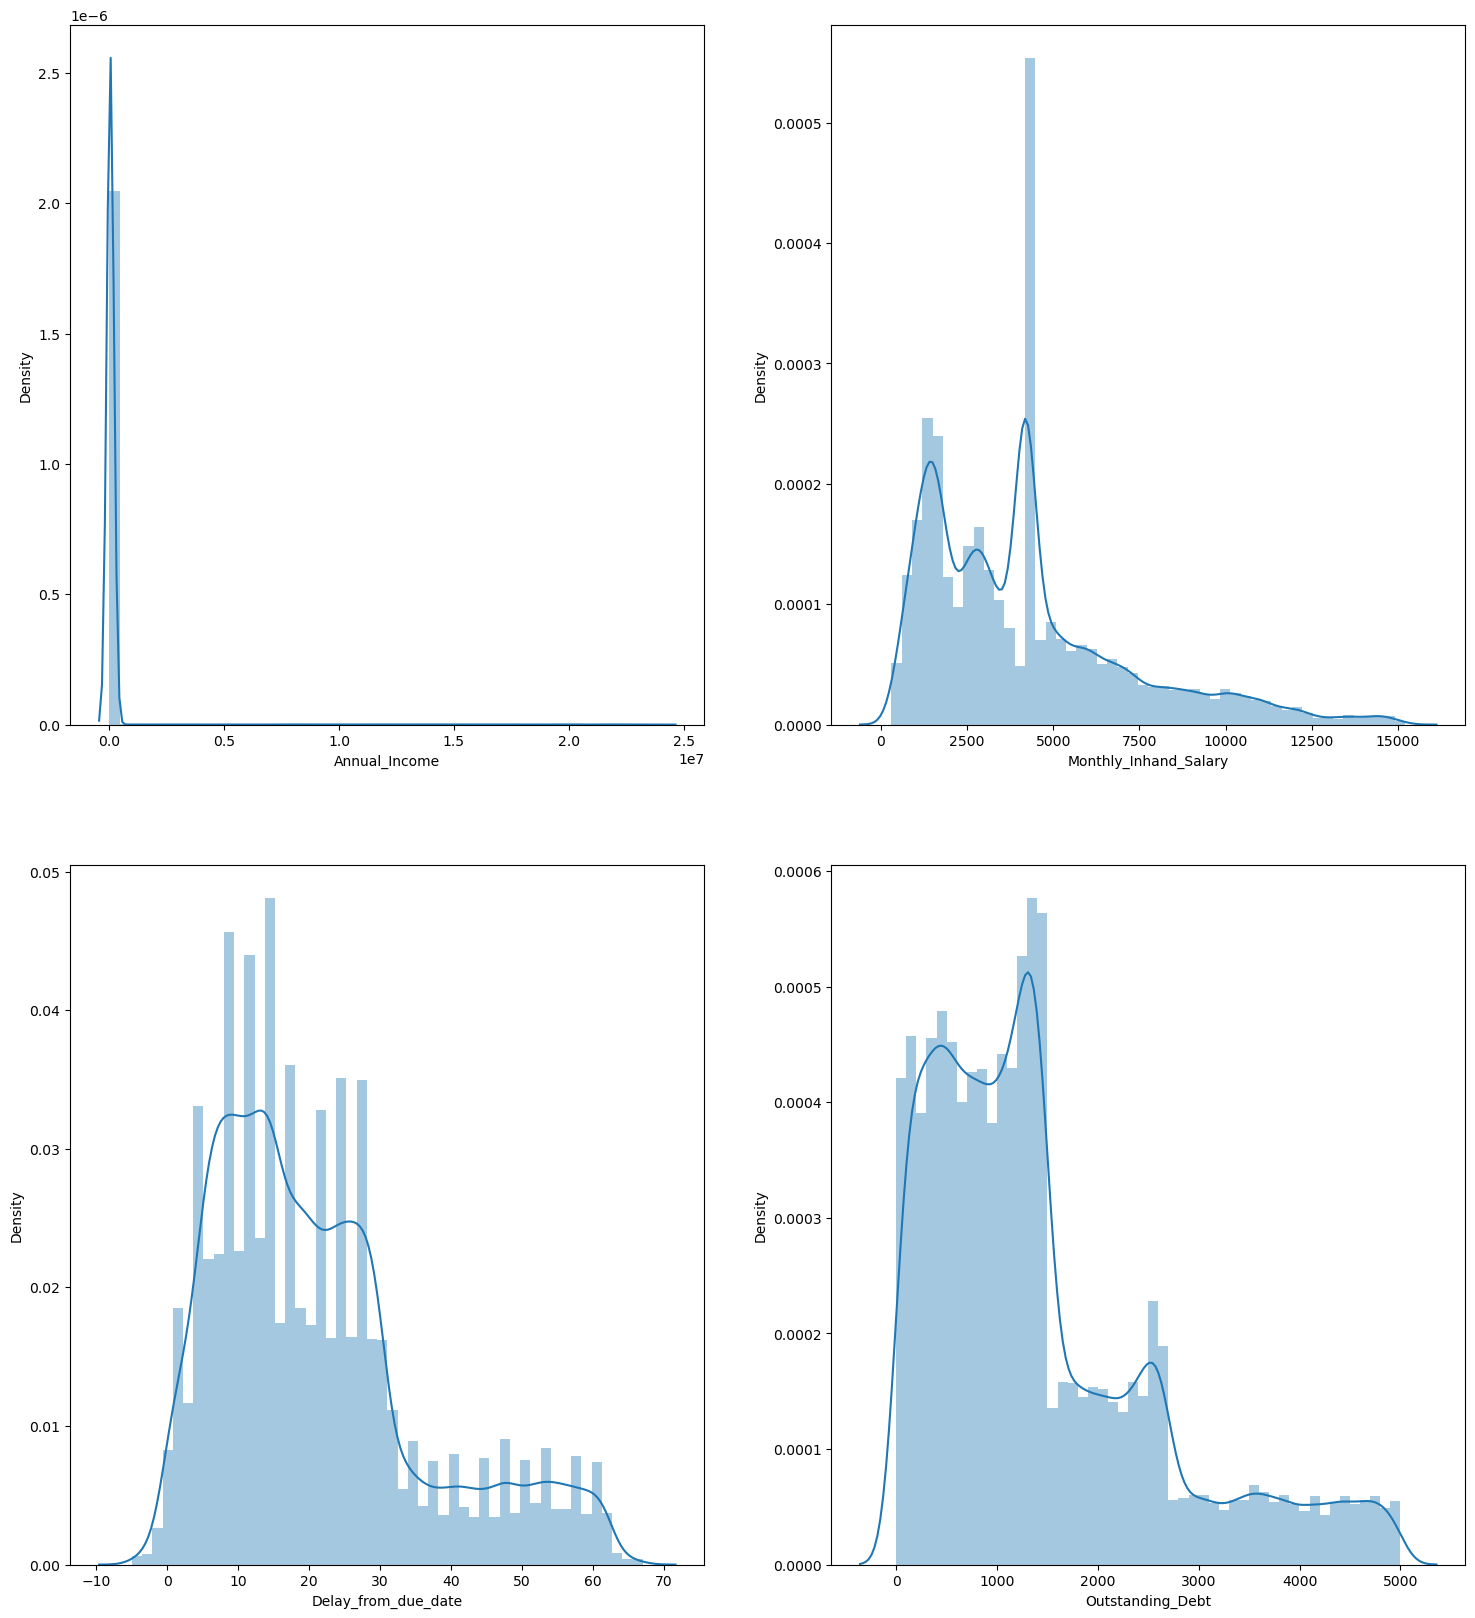

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(18, 20))
sns.distplot(df['Annual_Income'],ax=axs[0,0])
sns.distplot(df['Monthly_Inhand_Salary'],ax=axs[0,1])
sns.distplot(df['Delay_from_due_date'],ax=axs[1,0])
sns.distplot(df['Outstanding_Debt'],ax=axs[1,1])

# 4. Modeling

Create dummies from the categorical features.

In [35]:
dummies=pd.get_dummies(df[['Occupation','Payment_of_Min_Amount']],drop_first=True)
dummies.head()

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


Drop the original features from the data set.

In [36]:
df.drop(columns=['Occupation','Payment_of_Min_Amount'],axis=1,inplace=True)

Define the x and y for modelling.

In [37]:
y = df['Credit_Score']
x = df.drop('Credit_Score',axis = 1)

Scale the dataset using <code>StandardScaler</code>

In [38]:
x_scaled = pd.DataFrame(StandardScaler().fit_transform(x), columns = x.columns)
x_scaled.set_index(x.index, inplace = True)
x_scaled.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,-0.959568,-0.109789,-0.806836,-1.215285,-0.109897,-0.533508,0.509089,-0.162111,-0.278461,0.408850,0.009908
1,-0.959568,-0.109789,-0.000156,-1.484002,0.000200,-0.533508,-0.000112,-0.162111,-0.259445,-0.132221,0.009908
3,-0.959568,-0.109789,-0.000156,-1.080927,-0.123577,-0.533508,0.509089,-0.162111,-0.218675,-1.214362,0.009908
4,-0.959568,-0.109789,-0.806836,-1.013748,0.000200,-0.533508,0.509089,-0.162111,-0.298046,0.949920,0.009908
6,-0.959568,-0.109789,-0.806836,-1.215285,-0.105337,-0.533508,0.509089,-0.162111,-0.229279,-1.214362,0.009908


Combine the dummies with the final data.

In [39]:
x = x.join(dummies)
x_scaled = x_scaled.join(dummies)

Split the dataset using <code>train_test_split</code> for the scaled and non-scaled datasets.

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [41]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=1)

### Decision Tree Classifier

In [44]:
dt = DecisionTreeClassifier(random_state=1)
dt = dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
cm_dt = confusion_matrix(y_test,y_pred_dt)

print("confusion matrics=",cm_dt)
print(classification_report(y_test,y_pred_dt))

confusion matrics= [[3204 1420  160]
 [1475 6317 1163]
 [ 189 1109 1658]]
              precision    recall  f1-score   support

           1       0.66      0.67      0.66      4784
           2       0.71      0.71      0.71      8955
           3       0.56      0.56      0.56      2956

    accuracy                           0.67     16695
   macro avg       0.64      0.65      0.64     16695
weighted avg       0.67      0.67      0.67     16695



### K Nearest Neighbor Classifier

In [45]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

y_pred_kn = kn.predict(x_test)
cm_kn = confusion_matrix(y_test,y_pred_kn)

print("confusion matrics=",cm_kn)
print(classification_report(y_test,y_pred_kn))

confusion matrics= [[3312 1346  126]
 [1689 6475  791]
 [ 333 1481 1142]]
              precision    recall  f1-score   support

           1       0.62      0.69      0.65      4784
           2       0.70      0.72      0.71      8955
           3       0.55      0.39      0.46      2956

    accuracy                           0.65     16695
   macro avg       0.62      0.60      0.61     16695
weighted avg       0.65      0.65      0.65     16695



### Random Forest Classifier

In [52]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
cm_rf = confusion_matrix(y_test,y_pred_rf)

print("confusion matrics=",cm_rf)
print(classification_report(y_test,y_pred_rf))

confusion matrics= [[3627 1049  108]
 [1124 7156  675]
 [  26 1133 1797]]
              precision    recall  f1-score   support

           1       0.76      0.76      0.76      4784
           2       0.77      0.80      0.78      8955
           3       0.70      0.61      0.65      2956

    accuracy                           0.75     16695
   macro avg       0.74      0.72      0.73     16695
weighted avg       0.75      0.75      0.75     16695



### Decision Tree Classifier (Scaled Datasets)

In [47]:
dt_scaled = DecisionTreeClassifier(random_state=1)
dt_scaled = dt.fit(x_train_scaled, y_train)

y_pred_dt_scaled = dt_scaled.predict(x_test_scaled)
cm_dt_scaled = confusion_matrix(y_test,y_pred_dt_scaled)

print("confusion matrics=",cm_dt_scaled)
print(classification_report(y_test,y_pred_dt_scaled))

confusion matrics= [[3255 1381  148]
 [1449 6405 1101]
 [ 139 1102 1715]]
              precision    recall  f1-score   support

           1       0.67      0.68      0.68      4784
           2       0.72      0.72      0.72      8955
           3       0.58      0.58      0.58      2956

    accuracy                           0.68     16695
   macro avg       0.66      0.66      0.66     16695
weighted avg       0.68      0.68      0.68     16695



### K Nearest Neighbor Classifier  (Scaled Datasets)

In [48]:
kn_scaled = KNeighborsClassifier()
kn_scaled.fit(x_train_scaled, y_train)

y_pred_kn_scaled = kn_scaled.predict(x_test_scaled)
cm_kn_scaled = confusion_matrix(y_test,y_pred_kn_scaled)

print("confusion matrics=",cm_kn_scaled)
print(classification_report(y_test,y_pred_kn_scaled))

confusion matrics= [[3074 1545  165]
 [1629 6438  888]
 [ 239 1443 1274]]
              precision    recall  f1-score   support

           1       0.62      0.64      0.63      4784
           2       0.68      0.72      0.70      8955
           3       0.55      0.43      0.48      2956

    accuracy                           0.65     16695
   macro avg       0.62      0.60      0.60     16695
weighted avg       0.64      0.65      0.64     16695



### Random Forest Classifier  (Scaled Datasets)

In [53]:
rf_scaled = RandomForestClassifier(random_state=1)
rf_scaled.fit(x_train_scaled, y_train)

y_pred_rf_scaled = rf_scaled.predict(x_test_scaled)
cm_rf_scaled = confusion_matrix(y_test,y_pred_rf_scaled)

print("confusion matrics=",cm_rf_scaled)
print(classification_report(y_test,y_pred_rf_scaled))

confusion matrics= [[3657 1048   79]
 [1097 7187  671]
 [  20 1088 1848]]
              precision    recall  f1-score   support

           1       0.77      0.76      0.77      4784
           2       0.77      0.80      0.79      8955
           3       0.71      0.63      0.67      2956

    accuracy                           0.76     16695
   macro avg       0.75      0.73      0.74     16695
weighted avg       0.76      0.76      0.76     16695



# Evaluation

From the classification report we can say that Random Forest Classifier (Scaled Datasets) is the best method for classifying credit score but there's definitely still room for more development.

Now we can use this method to classify the test dataset.

In [56]:
final_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [57]:
col_name = ['ID','Customer_ID','Month','Name','SSN','Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate','Num_of_Loan',
            'Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix','Credit_Utilization_Ratio']
final_test = final_test.drop(col_name , axis=1)
final_test.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,7,809.98,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,1824.843333,3,9,809.98,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,24,Scientist,19114.12,1824.843333,-1,4,809.98,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,24_,Scientist,19114.12,NaN,4,5,809.98,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,28,_______,34847.84,3037.986667,3,1,605.03,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [59]:
numerical=['Age','Annual_Income','Num_of_Delayed_Payment','Outstanding_Debt',
           'Amount_invested_monthly','Monthly_Balance']
for i in numerical:
    print(i, 'unique values:', final_test[i].unique(), '\n')

Age unique values: ['23' '24' '24_' '28' '35' '55' '22' '31' '32' '1694' '34' '30' '914' '45'
 '41_' '41' '33' '36' '39' '40' '40_' '37' '21' '46' '26' '27' '32_' '42'
 '42_' '20' '48' '49' '33_' '38' '38_' '44' '-500' '16' '17' '37_' '19_'
 '19' '3193' '43' '339' '14' '15' '25' '21_' '1203' '46_' '2823' '22_'
 '18' '47' '1643' '20_' '35_' '8327_' '29' '29_' '28_' '53' '56' '26_'
 '6586' '7014' '3391' '54' '3765' '43_' '18_' '47_' '4472' '50' '4022'
 '48_' '4576' '51' '52' '34_' '50_' '3355' '8034' '4610_' '27_' '31_'
 '7860' '36_' '2526' '45_' '3263' '4885' '51_' '39_' '25_' '694' '8288'
 '52_' '8404' '451' '3168' '5172' '8214' '4946' '3127' '55_' '7018' '2950'
 '7676' '5502' '4133' '2083' '3752' '23_' '2970' '7721' '4806' '30_'
 '5426' '4787' '44_' '4390' '3218' '6000' '538' '7319' '17_' '5530' '6838'
 '2069' '8337' '2532' '1587' '7749' '56_' '5255' '5532' '7045' '1950'
 '5333' '53_' '16_' '2077_' '1844' '2954' '4329' '1919' '8449' '7237'
 '5061' '2695' '3287' '7507' '4556' '15_' '50

In [61]:
category=['Occupation','Payment_of_Min_Amount','Payment_Behaviour']
for i in category:
    print(i, 'unique values:', final_test[i].unique(), '\n')

Occupation unique values: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect'] 

Payment_of_Min_Amount unique values: ['No' 'Yes' 'NM'] 

Payment_Behaviour unique values: ['Low_spent_Small_value_payments' 'High_spent_Medium_value_payments'
 'Low_spent_Medium_value_payments' 'High_spent_Large_value_payments'
 'Low_spent_Large_value_payments' '!@9#%8'
 'High_spent_Small_value_payments'] 



In [62]:
symbol = "\\`*__{}[]()>#@+!$:;"
for i in numerical:
    for sym in symbol:
        final_test[i] = final_test[i].astype(str).str.replace(sym,'')

final_test.drop(final_test[final_test['Occupation'] == '_______'].index, inplace = True)
final_test.drop(final_test[final_test['Payment_Behaviour'] == '!@9#%8'].index, inplace = True)

for i in numerical:
    final_test[i] = final_test[i].astype(float)

In [64]:
final_test['Credit_History_Age'] = final_test['Credit_History_Age'].str.slice(0, 2)
final_test['Credit_History_Age'] = final_test['Credit_History_Age'].astype(float)

In [65]:
final_test.isnull().sum()

Age                           0
Occupation                    0
Annual_Income                 0
Monthly_Inhand_Salary      6509
Delay_from_due_date           0
Num_of_Delayed_Payment     3013
Outstanding_Debt              0
Credit_History_Age         3807
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly    1972
Payment_Behaviour             0
Monthly_Balance             486
dtype: int64

In [66]:
missing=['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Credit_History_Age','Amount_invested_monthly','Monthly_Balance']

for i in missing:
    final_test[i]=final_test[i].fillna(final_test[i].mean())

In [67]:
final_test.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,43000.000000,4.300000e+04,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,4.300000e+04
mean,110.197186,1.667414e+05,4178.045326,21.083814,30.689574,1426.813081,18.486541,1515.723122,640.959949,-4.704333e+22
std,681.763522,1.357942e+06,2917.839821,14.873947,211.445649,1156.189022,7.928597,8672.305086,2004.894403,3.937264e+24
min,-500.000000,7.005930e+03,303.645417,-5.000000,-3.000000,0.230000,0.000000,0.000000,0.000000,-3.333333e+26
25%,25.000000,1.942714e+04,1794.197500,10.000000,9.000000,565.040000,13.000000,32.176647,76.989556,2.681719e+02
50%,34.000000,3.759269e+04,3856.425000,18.000000,15.000000,1165.735000,18.486541,74.834632,143.214358,3.347581e+02
75%,43.000000,7.281724e+04,5333.060833,28.000000,19.000000,1950.860000,24.000000,176.041285,306.552078,4.688270e+02
max,8688.000000,2.413726e+07,15204.633333,67.000000,4399.000000,4998.070000,34.000000,82398.000000,10000.000000,1.606518e+03


In [68]:
Q1 = np.quantile(final_test['Age'],0.25)
Q3 = np.quantile(final_test['Age'],0.75)
IQR = Q3 - Q1
final_test = final_test.drop(final_test.loc[final_test['Age'] > (Q3 + 1.5 * IQR)].index)
final_test = final_test.drop(final_test.loc[final_test['Age'] < (Q1 - 1.5 * IQR)].index)

In [71]:
final_test['Payment_Behaviour'] = final_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
final_test['Payment_Behaviour'] = final_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
final_test['Payment_Behaviour'] = final_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
final_test['Payment_Behaviour'] = final_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
final_test['Payment_Behaviour'] = final_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
final_test['Payment_Behaviour'] = final_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
final_test['Payment_Behaviour'] = final_test['Payment_Behaviour'].apply(pd.to_numeric)

In [72]:
dummies=pd.get_dummies(final_test[['Occupation','Payment_of_Min_Amount']],drop_first=True)
final_test.drop(columns=['Occupation','Payment_of_Min_Amount'],axis=1,inplace=True)
final_test = final_test.join(dummies)

In [73]:
rf = RandomForestClassifier(random_state=10)
rf.fit(x, y)
result = rf.predict(final_test)
result

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)